# Punto 3 Quiz 1

Considere un electrón de masa $m$ y carga $q$ confinado a existir en una región unidimensional de lado $L$. La energía potencial dentro de la región es $U=U_0$, y por fuera es $U=\infty$. En las fronteras de la región la función de onda satisface condiciones de frontera tipo Dirichlet $\Psi(0,t)=\Psi(L,t)=0$. Si la probabilidad de encontrar la partícula en todo el cubo es $1.0$, determinar:

(a) Las autofunciones y autoenergías
(b) La densidad de probabilidad

# Solución

Ya hemos probado en el punto 2 que la función de onda tendrá 2 componentes, las cuales, debido a la ausencia de spin y la naturaleza constante del potencial considerado, satisfarán independientemente la ecuación de Klein-Gordon. Por tanto, se resolverá la ecuación de Klein-Gordon únicamente para una componente, ya que la otra será exactamente igual.

Comenzamos por escribir la ecuación de Klein-Gordon para una partícula cuando se tiene interacción con un campo electromagnético.

$$\frac{1}{c^2}\big(i \hbar \frac{\partial}{\partial t}-\frac{q}{c}A^0\big)^2\Psi=\big[\big(\hat{\boldsymbol{p}}-\frac{q}{c}\boldsymbol{A}\big)^2+m^2 c^2\big]\Psi$$

En nuestro caso, el potencial es escalar y constante, por tanto se tiene la siguiente expresión:

$$\big(\hbar^2 \frac{\partial^2}{\partial t^2}+2 i \hbar U_0 \frac{\partial}{\partial t}\big)\Psi=\big(\hbar^2 c^2 \frac{\partial^2}{\partial x^2}-m^2 c^4 + U_0^2\big)\Psi$$

En esta forma, es claro que la ecuación se puede separar en un producto de 2 funciones, una que solo dependa de $x$ y otra que sólo dependa de $t$. Primero nos concetramos en la parte espacial, es decir, resolveremos:

$$\big(-\hbar^2 c^2 \frac{\partial^2}{\partial x^2}+m^2 c^4 - U_0^2\big)\Phi(x)=E^2 \Phi(x)$$

Para esto usamos el método de diferencias finitas. Usando la aproximación centrada de la segunda derivada, se tiene:

$$\frac{\partial^2 \Phi}{\partial x^2} \Bigg|_{x=x_n} \approx \frac{\Phi_{n+1}-2\Phi_n + \Phi_{n-1}}{(\Delta x)^2}=\frac{1}{(\Delta x)^2} 
\begin{pmatrix}
1 & -2 & 1
\end{pmatrix} \begin{pmatrix}
\Phi_{n+1} \\ \Phi_n \\ \Phi_{n-1}
\end{pmatrix}
$$

Considerando la condición de frontera tipo Dirichlet $\Psi(0,t)=\Psi(L,t)=0$, o equivalentemente $\Phi(0)=\Phi(L)=0$ y la función de onda en todos los puntos, se puede mostrar que la matriz que representará la segunda derivada en cada punto y satisfará las condiciones de frontera está dado por:

$$ \begin{pmatrix}
\Phi_1'' \\ \Phi_2'' \\ \Phi_3'' \\ \vdots \\ \Phi_{n-4}'' \\ \Phi_{n-3}'' \\ \Phi_{n-2}''
\end{pmatrix} = \frac{1}{(\Delta x)^2} \begin{pmatrix}
-2 & 1 & 0 & & &\\
1 & -2 & 1 & & \cdots &\\
0 & 1 & -2 & & &\\
& & & \ddots & &\\
& \vdots & & -2 & 1 & 0\\
& & & 1 & -2 & 1\\
& & & 0 & 1 & -2
\end{pmatrix} \begin{pmatrix}
\Phi_1 \\ \Phi_2 \\ \Phi_3 \\ \vdots \\ \Phi_{n-4} \\ \Phi_{n-3} \\ \Phi_{n-2}
\end{pmatrix}$$

Note que se está haciendo $\Phi_0=\Phi_{n-1}=0$ si se tienen $n$ puntos en el dominio, es decir, se cumple la condición de frontera, y que en los puntos exactamente en la frontera no es posible obtener el valor de la segunda derivada.

Ahora sí, comenzamos la implementación. Primero importamos las librerías necesarias:

In [1]:
import numpy as np                 #Para los cálculos numéricos
import scipy.constants             #Para las constantes como la masa y la carga del electrón
from numpy.linalg import eig       #Para el cálculo de los autovalores y autovectores
import matplotlib.pyplot as plt    #Para las gráficas

In [2]:
#Se usará el Sistema Internacional de Unidades.

c2=scipy.constants.c**2                #Velocidad de la luz al cuadrado
m2c4 = scipy.constants.m_e**2*c2**2    #Energía en reposo del electrón al cuadrado
hb2 = scipy.constants.hbar**2          #Constante de Plank reducida al cuadrado

N=1000                                #Numéro de puntos que se toman del Dominio
L=1e-10                               #Tamaño de la región donde se confina el electrón
                    #Potencial al interior de la región donde se confina el electrón al cuadrado

dx2=(L/N)**2                           #Discretización espacial del dominio al cuadrado


Las primeras 2 autoenergías son: E_1 = 0.0002045536459706524 eV, y E_2 = 0.00020459888219292256 eV


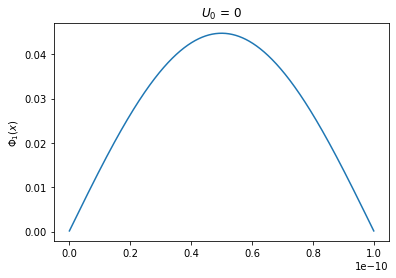

In [3]:
#Valor del potencial
U02=0

#Hamiltoniano resultante en forma matricial
H=-(hb2*c2/dx2)*(-2*np.identity(N-2)+np.diag(np.ones(N-3),-1)+np.diag(np.ones(N-3),1))+(m2c4-U02)*np.identity(N-2)

#Cálculo numérico de las autofunciones (EV) y las autoenergías (EE)
EE, EV = eig(H)

#Graficación
args = np.argsort(EE)

print('Las primeras 2 autoenergías son: E_1 =', np.sqrt(EE[args[0]]/scipy.constants.e),'eV, y E_2 =', np.sqrt(EE[args[1]]/scipy.constants.e),'eV')

x=np.linspace(0,L,N+1)
x=np.delete(x,0)
x=np.delete(x,999)
x=np.delete(x,998)
plt.title('$U_0$ = 0')
plt.ylabel('$\Phi_1(x)$')
plt.plot(x,EV[:,args[0]])




Las primeras 2 autoenergías son: E_1 = 0.00020454341954076583 eV, y E_2 = 0.00020458865802418477 eV


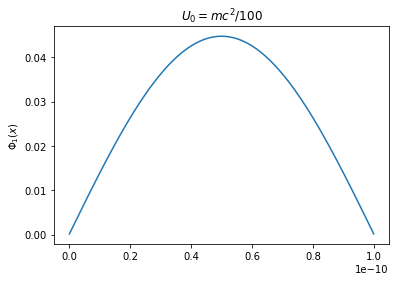

In [4]:
#Valor del potencial
U02=m2c4*(1e-2)**2

#Hamiltoniano resultante en forma matricial
H=-(hb2*c2/dx2)*(-2*np.identity(N-2)+np.diag(np.ones(N-3),-1)+np.diag(np.ones(N-3),1))+(m2c4-U02)*np.identity(N-2)

#Cálculo numérico de las autofunciones (EV) y las autoenergías (EE)
EE, EV = eig(H)

#Graficación
args = np.argsort(EE)

print('Las primeras 2 autoenergías son: E_1 =', np.sqrt(EE[args[0]]/scipy.constants.e),'eV, y E_2 =', np.sqrt(EE[args[1]]/scipy.constants.e),'eV')

x=np.linspace(0,L,N+1)
x=np.delete(x,0)
x=np.delete(x,999)
x=np.delete(x,998)
plt.title('$U_0 = mc^2/100$')
plt.ylabel('$\Phi_1(x)$')
plt.plot(x,EV[:,args[0]])


Las primeras 2 autoenergías son: E_1 = 2.4838529022743875e-06 eV, y E_2 = 4.967699663581915e-06 eV


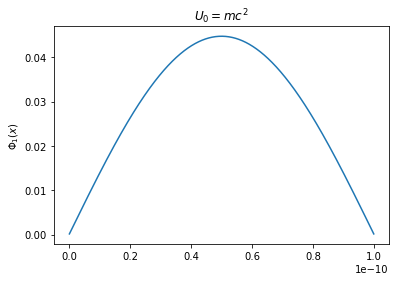

In [5]:
#Valor del potencial
U02=m2c4

#Hamiltoniano resultante en forma matricial
H=-(hb2*c2/dx2)*(-2*np.identity(N-2)+np.diag(np.ones(N-3),-1)+np.diag(np.ones(N-3),1))+(m2c4-U02)*np.identity(N-2)

#Cálculo numérico de las autofunciones (EV) y las autoenergías (EE)
EE, EV = eig(H)

#Graficación
args = np.argsort(EE)

print('Las primeras 2 autoenergías son: E_1 =', np.sqrt(EE[args[0]]/scipy.constants.e),'eV, y E_2 =', np.sqrt(EE[args[1]]/scipy.constants.e),'eV')

x=np.linspace(0,L,N+1)
x=np.delete(x,0)
x=np.delete(x,999)
x=np.delete(x,998)
plt.title('$U_0 = mc^2$')
plt.ylabel('$\Phi_1(x)$')
plt.plot(x,EV[:,args[0]])


Las primeras 2 autoenergías son: E_1 = 2.045385639340985 eV, y E_2 = 2.0453856393364656 eV


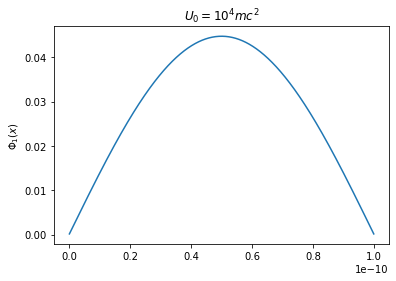

In [6]:
#Valor del potencial
U02=m2c4*(1e4)**2

#Hamiltoniano resultante en forma matricial
H=-(hb2*c2/dx2)*(-2*np.identity(N-2)+np.diag(np.ones(N-3),-1)+np.diag(np.ones(N-3),1))+(m2c4-U02)*np.identity(N-2)

#Cálculo numérico de las autofunciones (EV) y las autoenergías (EE)
EE, EV = eig(H)

#Graficación
args = np.argsort(EE)

print('Las primeras 2 autoenergías son: E_1 =', np.sqrt(-EE[args[0]]/scipy.constants.e),'eV, y E_2 =', np.sqrt(-EE[args[1]]/scipy.constants.e),'eV')

x=np.linspace(0,L,N+1)
x=np.delete(x,0)
x=np.delete(x,999)
x=np.delete(x,998)
plt.title('$U_0 = 10^4 mc^2$')
plt.ylabel('$\Phi_1(x)$')
plt.plot(x,-EV[:,args[0]])


Ahora, sabemos que para la ecuación de Dirac, la densidad de probabilidad está dada por:

$$\rho = \Psi^{\dagger} \Psi$$

Como en este caso las 2 componentes de $\Psi$ son iguales, esto es equivalente a 2 veces densidad de probabilidad de una sola de las componentes. Tomando como ejemplo la segunda autofunción obtenida con U_0 = 0, el resultado es:

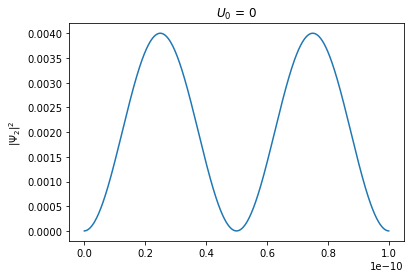

In [20]:
#Valor del potencial
U02=0

#Hamiltoniano resultante en forma matricial
H=-(hb2*c2/dx2)*(-2*np.identity(N-2)+np.diag(np.ones(N-3),-1)+np.diag(np.ones(N-3),1))+(m2c4-U02)*np.identity(N-2)

#Cálculo numérico de las autofunciones (EV) y las autoenergías (EE)
EE, EV = eig(H)

#Graficación
args = np.argsort(EE)

x=np.linspace(0,L,N+1)
x=np.delete(x,0)
x=np.delete(x,999)
x=np.delete(x,998)
plt.title('$U_0$ = 0')
plt.ylabel('$|\Psi_2|^2$')
plt.plot(x,2*np.square(EV[:,args[1]]))
